In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt 
import matplotlib.pyplot as plt

df = pd.read_csv("D:/DATA ANALYST PORTFOLIO PROJECT/STOCK PRICE FORECAST/Netflix Stock Price Data set 2002-2022.csv")


In [2]:
#CHECK DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [3]:
#CHECK DATA
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
#CHECK DATA
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [5]:
#TIME SERIES ANALYSIS
#Calculate Relative Strength Index (RSI) for 30 days
change = df['Close'].diff()
change.dropna(inplace=True)

## Create 2 copies of Closing Price
change_up = change.copy()
change_down = change.copy()

change_up[change_up < 0] = 0
change_down[change_down > 0] = 0

##Calculate the rolling average of avg_up and avg_dn for 30 days
avg_up_30days = change_up.rolling(30).mean()
avg_down_30days = change_down.rolling(30).mean().abs()

##Calculate RSI
df['RSI'] = avg_up_30days * 100 / (avg_up_30days + avg_down_30days)
df['RSI']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5039    27.661791
5040    28.439385
5041    25.627704
5042    44.956496
5043    45.359829
Name: RSI, Length: 5044, dtype: float64

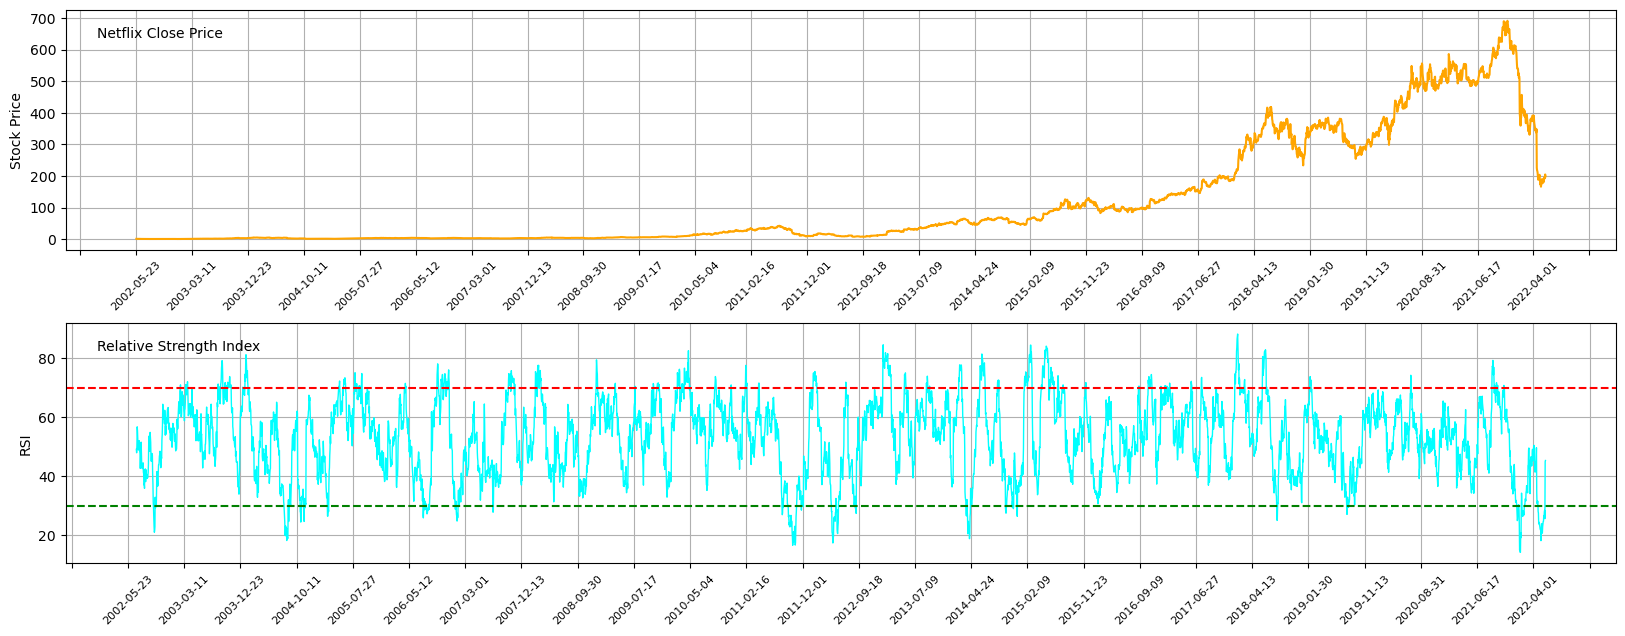

In [6]:
##1.VISUALIZE NETFLIX STOCK PRICE & RSI OVER TIME
# Create two charts on the same figure.
plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the closing price on the first chart
ax1.plot(df['Date'],
         df['Close'],
         color = 'orange')
ax1.set_ylabel('Stock Price')
ax1.set_title('Netflix Close Price', loc= 'left', y=0.85, x=0.02, fontsize='medium')
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
ax1.tick_params(axis='x', labelrotation=45, labelsize=8)
ax1.grid(True)

# Plot the RSI on the second chart
ax2.plot(df['Date'], df['RSI'],
         color = 'cyan', linewidth = 1)
ax2.set_title('Relative Strength Index', loc= 'left', y=0.85, x=0.02, fontsize='medium')
ax2.set_ylabel('RSI')
ax2.xaxis.set_major_locator(plt.MaxNLocator(30))
ax2.tick_params(axis='x', labelrotation=45, labelsize=8)
ax2.grid(True)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
ax2.grid(True)
plt.show()

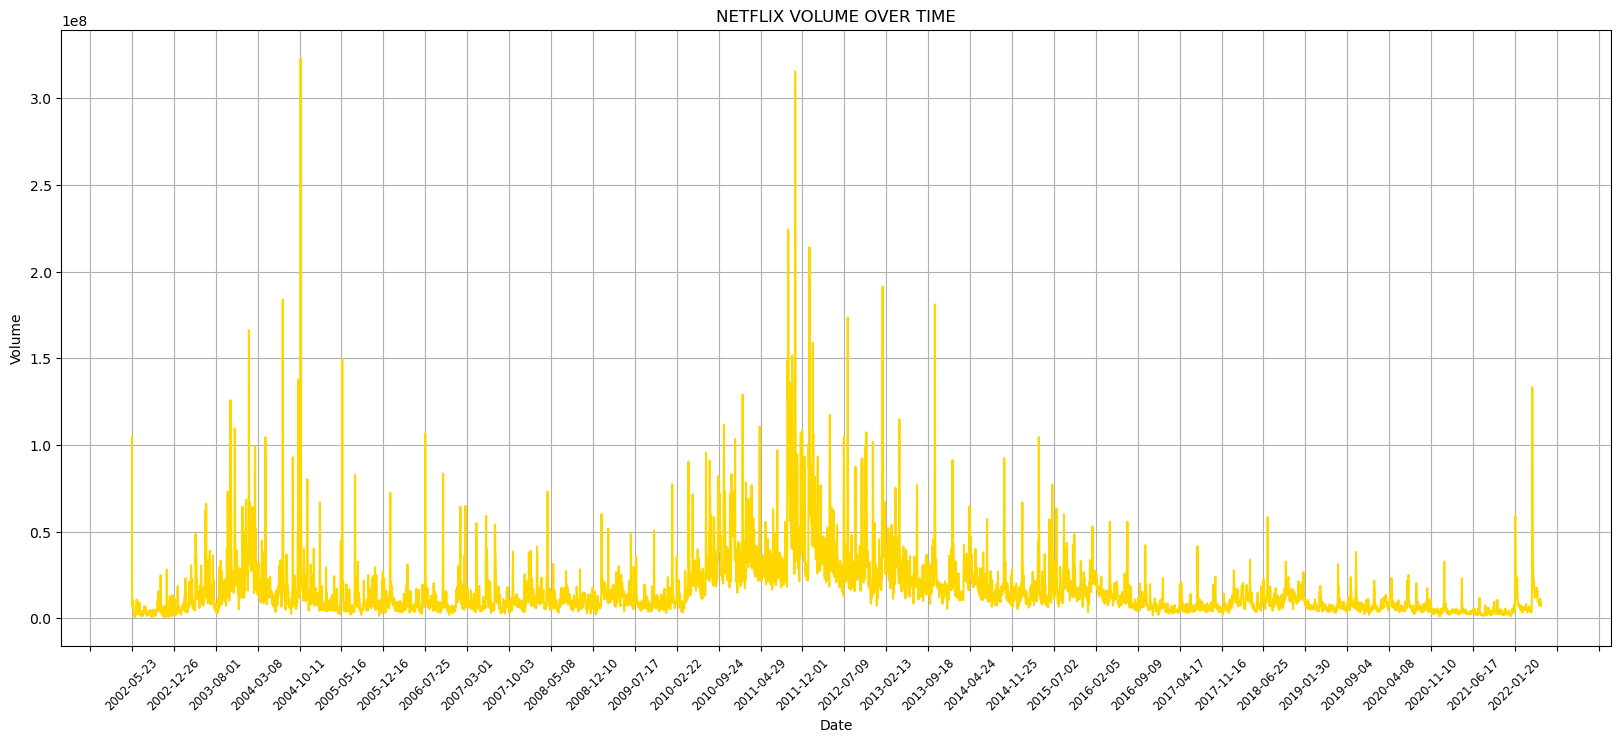

In [7]:
##2.VISUALIZE NETFLIX VOLUME OVER TIME
plt.figure(figsize=(20,8))
sns.lineplot(data=df,
            x= 'Date',
            y= 'Volume',
            color= 'gold')
plt.title('NETFLIX VOLUME OVER TIME')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.subplot().xaxis.set_major_locator(plt.MaxNLocator(40))
plt.xticks(rotation = 45, fontsize = 'small')
plt.grid()
plt.show()

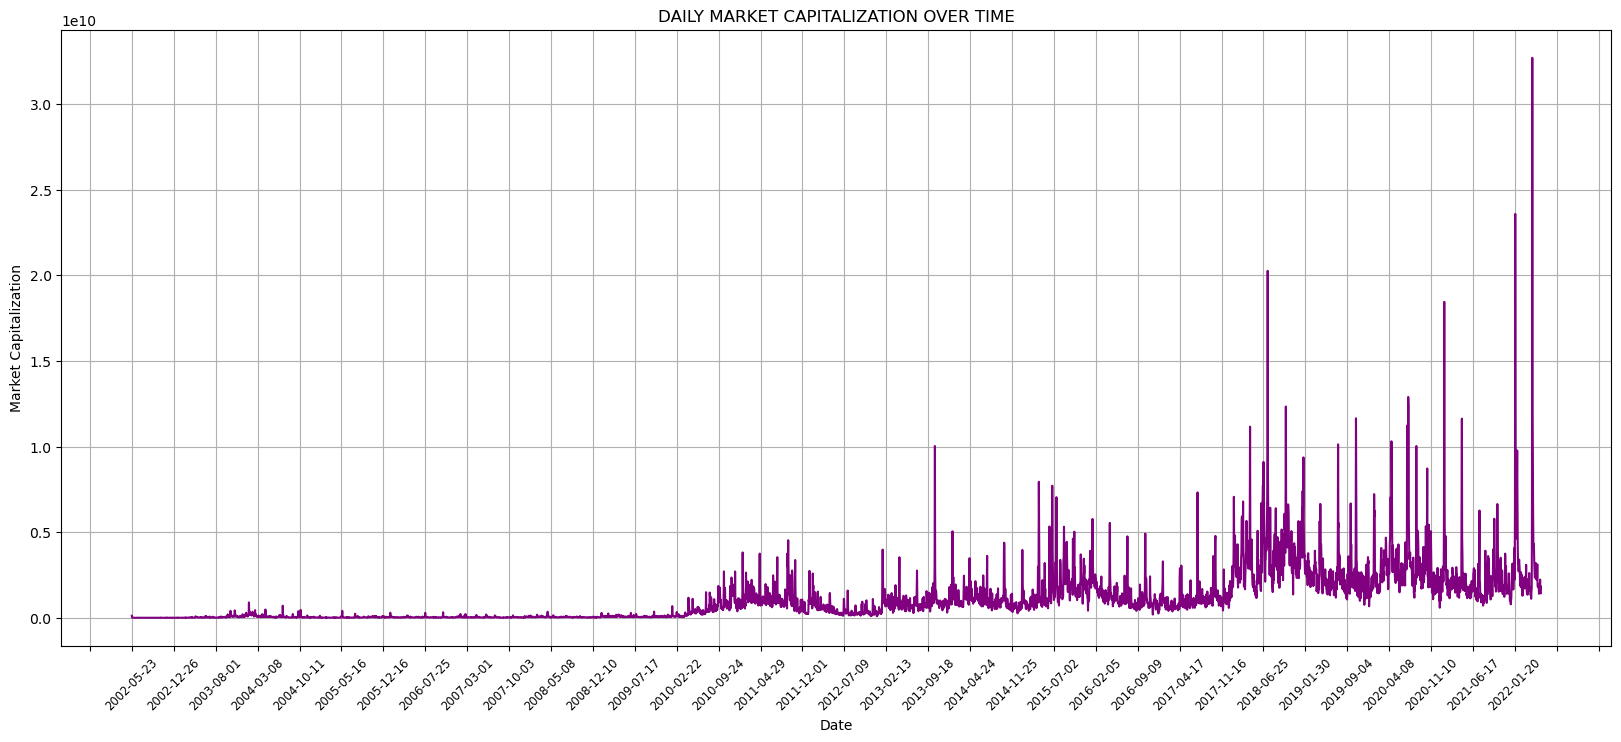

In [8]:
##3. DAILY MARKET CAPITALIZATION OVER TIME
df['Market Cap'] = df['Open'] * df['Volume']
plt.figure(figsize=(20,8))
sns.lineplot(data=df,
            x= 'Date',
            y= 'Market Cap',
            color= 'purple')
plt.title('DAILY MARKET CAPITALIZATION OVER TIME')
plt.xlabel('Date')
plt.ylabel('Market Capitalization')
plt.subplot().xaxis.set_major_locator(plt.MaxNLocator(40))
plt.xticks(rotation = 45, fontsize = 'small')
plt.grid()
plt.show()

In [9]:
##4. DAILY VOLTALITY OVER TIME
df['pre_Close'] = df['Close'].shift(1)
df['Voltality'] = df['Close']/df['pre_Close'] -1
df[['Close', 'pre_Close', 'Voltality']]

,Close,pre_Close,Voltality
0,1.196429,NaN,NaN
1,1.210000,1.196429,0.011343
2,1.157143,1.210000,-0.043683
3,1.103571,1.157143,-0.046297
4,1.071429,1.103571,-0.029125
...,...,...,...
5039,195.190002,191.399994,0.019802
5040,197.440002,195.190002,0.011527
5041,192.910004,197.440002,-0.022944
5042,205.089996,192.910004,0.063138


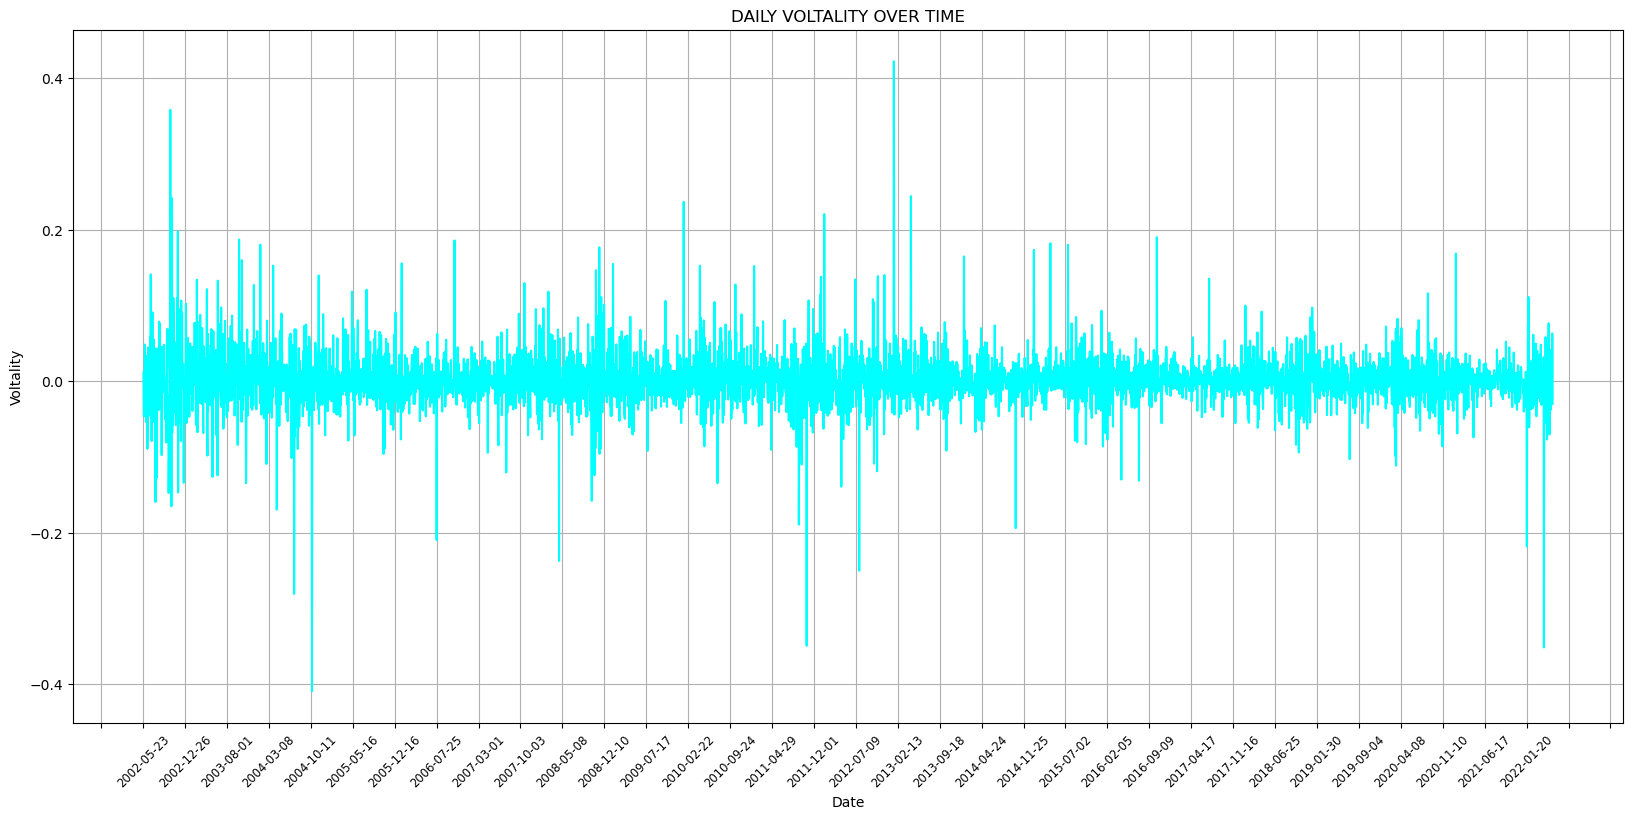

In [10]:
plt.figure(figsize=(20,9))
sns.lineplot(data=df,
             x= 'Date',
             y= 'Voltality',
             color= 'cyan')
plt.title('DAILY VOLTALITY OVER TIME')
plt.xlabel('Date')
plt.ylabel('Voltality')
plt.xticks(rotation = 45, fontsize = 'small')
plt.subplot().xaxis.set_major_locator(plt.MaxNLocator(40))
plt.grid()
plt.show()

In [11]:
##5. DAILY CUMULATIVE RETURN 
df['Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1+df['Return']).cumprod()
df[['Return', 'Cumulative Return']]

,Return,Cumulative Return
0,NaN,NaN
1,0.011343,1.011343
2,-0.043683,0.967164
3,-0.046297,0.922387
4,-0.029125,0.895522
...,...,...
5039,0.019802,163.143824
5040,0.011527,165.024420
5041,-0.022944,161.238155
5042,0.063138,171.418443


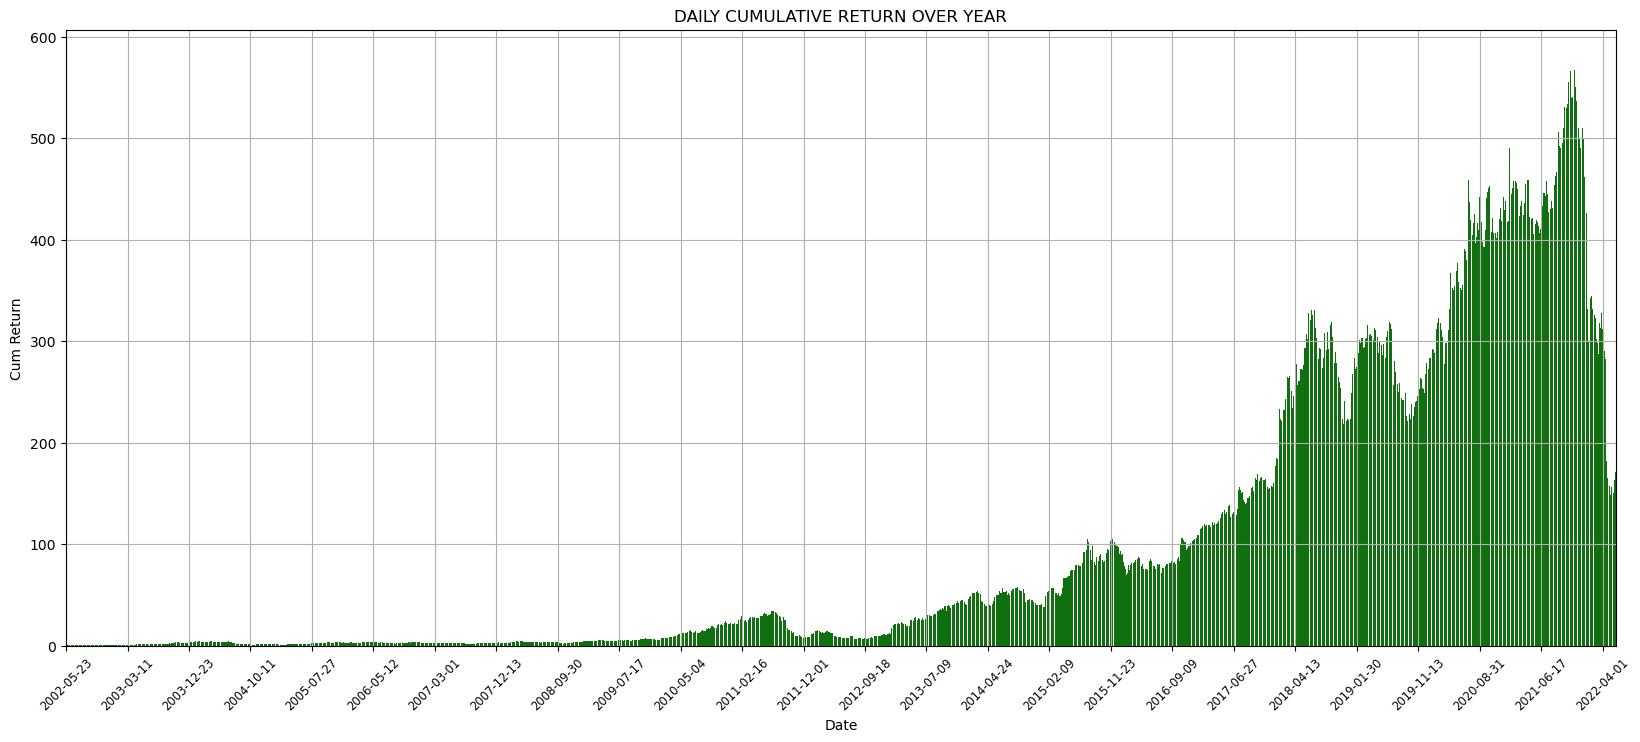

In [12]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,
            x= 'Date',
            y= 'Cumulative Return',
            color = 'green')
plt.title('DAILY CUMULATIVE RETURN OVER YEAR')
plt.xlabel('Date')
plt.ylabel('Cum Return')
plt.xticks(rotation = 45, fontsize = 'small')
plt.subplot().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.grid()
plt.show()

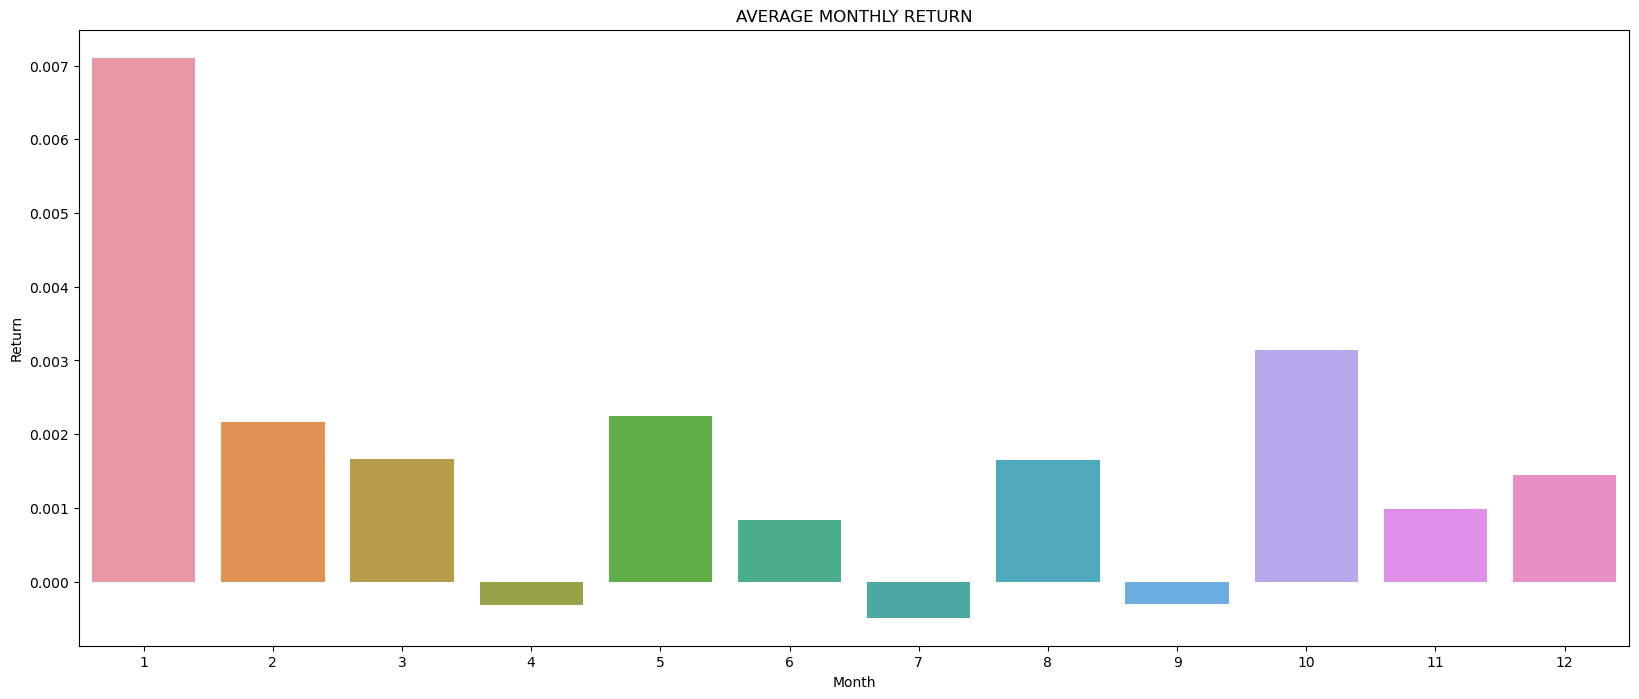

In [13]:
##6. AVERAGE MONTHLY RETURN
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_return = df.groupby(df['Month'])['Return'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(data=monthly_return,
            x= 'Month',
            y= 'Return')
plt.title('AVERAGE MONTHLY RETURN')
plt.show()

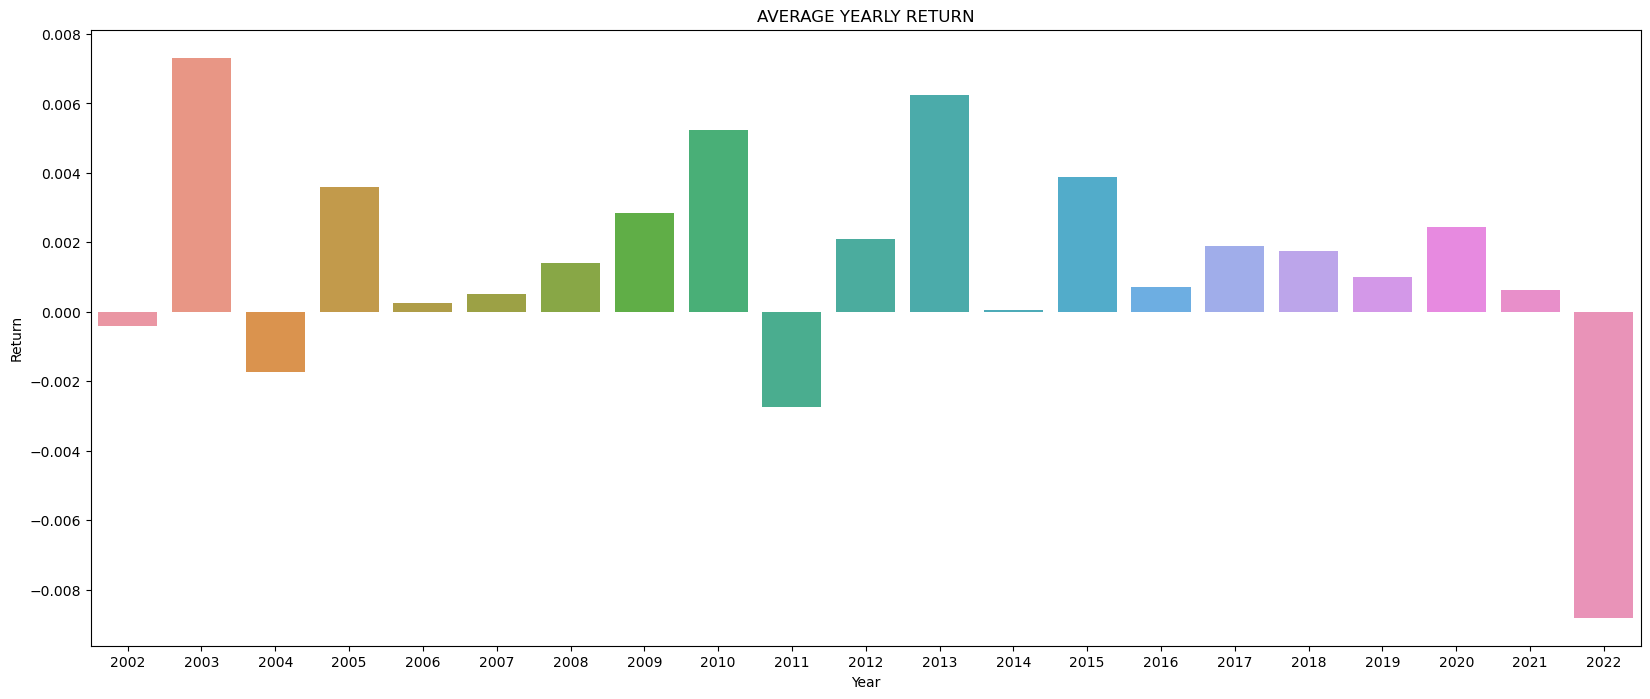

In [14]:
##7. AVERAGE YEARLY RETURN
df['Year'] = df['Date'].dt.year
yearly_return = df.groupby(df['Year'])['Return'].mean().reset_index()


plt.figure(figsize=(20,8))
sns.barplot(data=yearly_return,
            x= 'Year',
            y= 'Return')
plt.title('AVERAGE YEARLY RETURN')
plt.show()

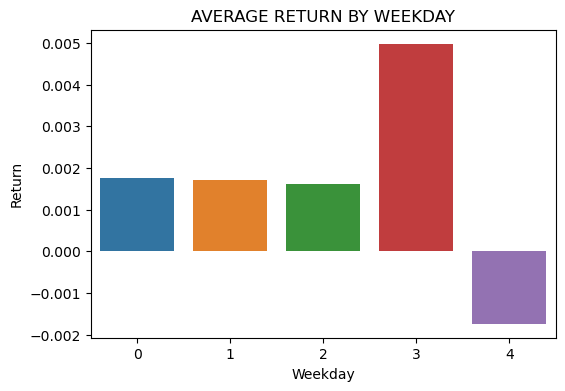

In [15]:
##8. AVERAGE RETURN BY WEEKDAY
df['Weekday'] = df['Date'].dt.weekday
yearly_return = df.groupby(df['Weekday'])['Return'].mean().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(data=yearly_return,
            x= 'Weekday',
            y= 'Return')
plt.title('AVERAGE RETURN BY WEEKDAY')
plt.show()

<Figure size 2000x800 with 0 Axes>

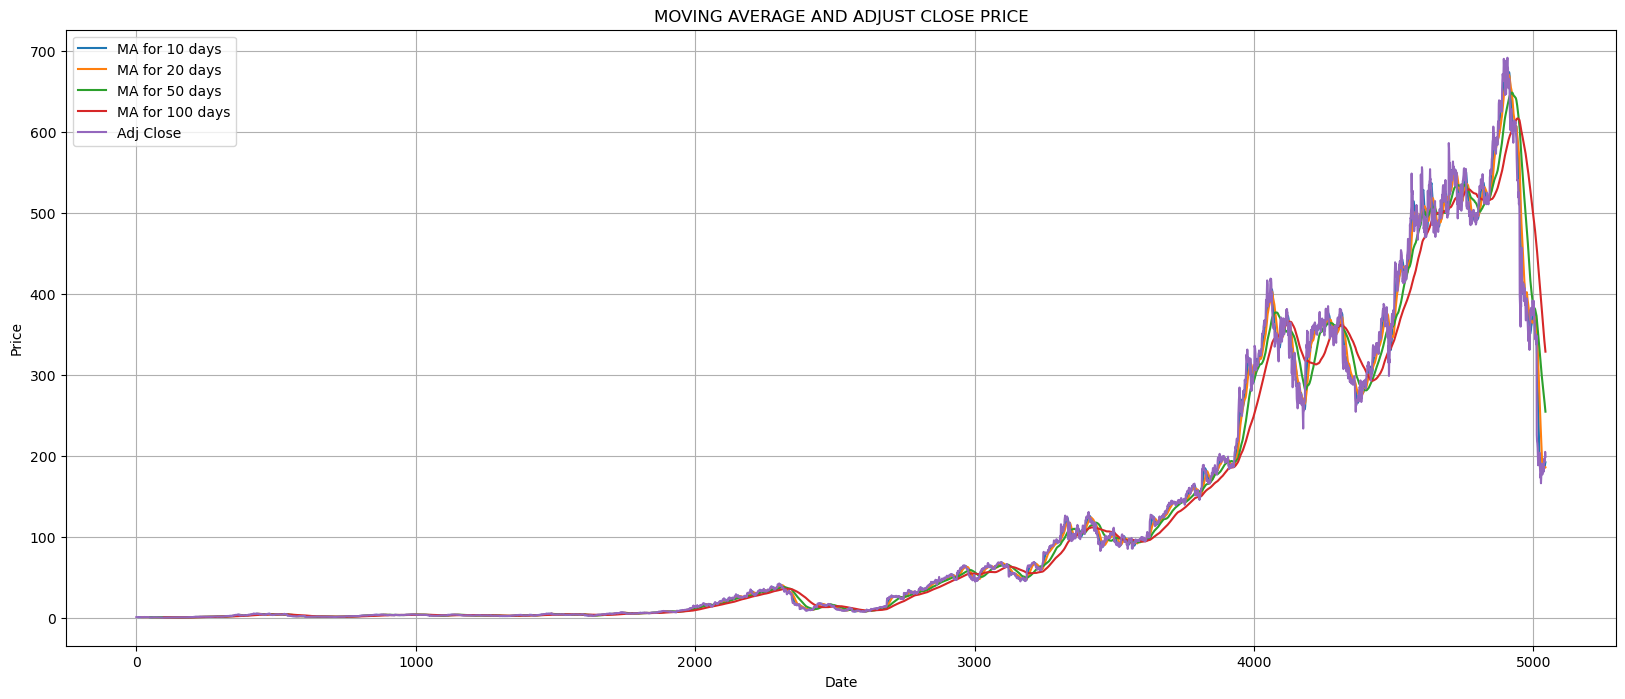

In [16]:
##9. MOVING AVERAGE 
df['MA for 10 days'] = df['Close'].rolling(10).mean()
df['MA for 20 days'] = df['Close'].rolling(20).mean()
df['MA for 50 days'] = df['Close'].rolling(50).mean()
df['MA for 100 days'] = df['Close'].rolling(100).mean()

plt.figure(figsize=(20,8))
df[['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'Adj Close']].plot(figsize = (20,8))
plt.title('MOVING AVERAGE AND ADJUST CLOSE PRICE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [17]:
!pip install prophet

In [18]:
#PRICE FORECASTING BY PROPHET
from prophet import Prophet
from prophet.plot import plot
from prophet.plot import add_changepoints_to_plot

##Split Date
df['Date'] = pd.to_datetime(df['Date'])
min_date = pd.to_datetime(df['Date']).min()
max_date = pd.to_datetime(df['Date']).max()

split_date = '2019-12-31'


train_time = df['Date'] <= split_date
test_time = df['Date'] > split_date

##Rename columns: 'Date' as datastamp (ds) and 'Close' as target variable (y)
train_data = df[train_time][['Date', 'Close']].rename(columns = {'Date' : 'ds', 'Close' : 'y'})
test_data = df[test_time][['Date', 'Close']].rename(columns = {'Date' : 'ds', 'Close' : 'y'})

#Fit model
model = Prophet()
model.fit(train_data)

#Generate Prediction using fitting model
future = model.make_future_dataframe(periods= 3650)
forecast = model.predict(future)
print(forecast)

22:24:39 - cmdstanpy - INFO - Chain [1] start processing
22:24:40 - cmdstanpy - INFO - Chain [1] done processing


             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2002-05-23     1.480100   -21.669936    36.317582     1.480100   
1    2002-05-24     1.481193   -24.564079    33.521835     1.481193   
2    2002-05-28     1.485565   -23.415517    35.368570     1.485565   
3    2002-05-29     1.486658   -20.821102    33.971557     1.486658   
4    2002-05-30     1.487751   -20.770390    33.750317     1.487751   
...         ...          ...          ...          ...          ...   
8078 2029-12-24  1181.431478   989.005284  1353.877836  1001.308409   
8079 2029-12-25  1181.649127   992.342139  1361.766086  1001.478369   
8080 2029-12-26  1181.866775  1001.816888  1358.421505  1001.648329   
8081 2029-12-27  1182.084424   989.045859  1360.967354  1001.818288   
8082 2029-12-28  1182.302072   996.689298  1362.698477  1001.988248   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        1.480100        4.461573              4.461573           

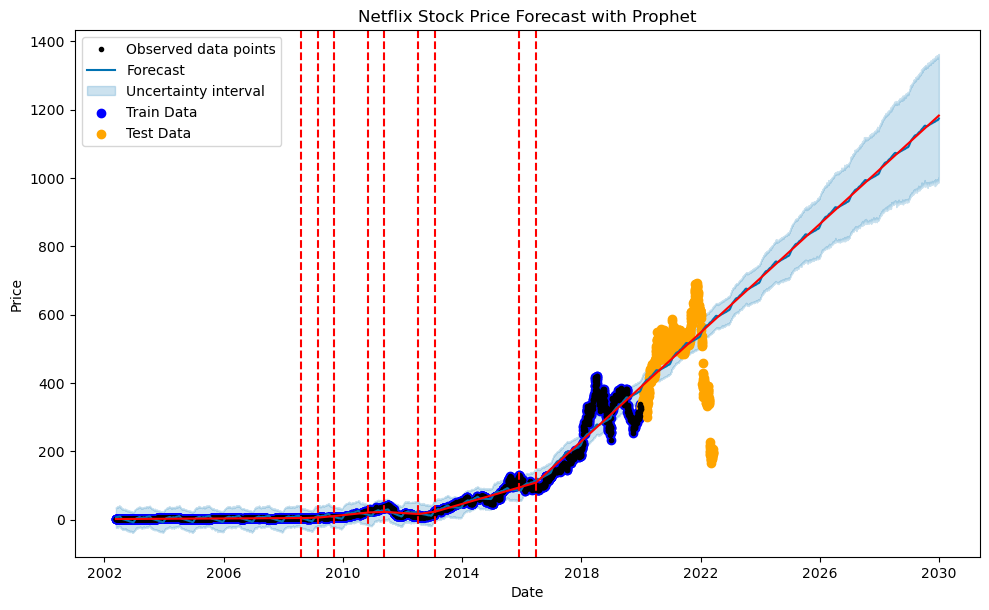

In [19]:
#Visualize the prediction
fig = model.plot(forecast)
plt.scatter(train_data['ds'],
            train_data['y'],
            color = 'blue',
            label = 'Train Data')
plt.scatter(test_data['ds'],
            test_data['y'],
            color = 'orange',
            label = 'Test Data')
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.title('Netflix Stock Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()